In [33]:
#Import all libraries that are required
%matplotlib inline

import numpy as np
import pandas as pd
# pd.options.display.float_formatrmat = '${:,.2f}'.format
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from io import BytesIO
from requests import get
from PIL import Image, ImageDraw
import instaloader
import pymongo

from pandas.io.json import json_normalize
import json

#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*
from itertools import dropwhile, takewhile
import collections
import requests
import base64

from pandas.tools.plotting import scatter_matrix
import nltk
from ast import literal_eval
from datetime import timedelta
import string

In [34]:
# create loader object
L = instaloader.Instaloader()

#Set PANDAS to show all columns in DataFrame
# pd.set_option('display.max_columns', None)
# plt.rcParams['figure.figsize'] = (15, 5)

UTC_FILE_NAME = "_UTC"
COMMENTS_FILE_NAME = "_comments"
FILE_ADDRESS_NAME = "InstagramLog/"


DONALD_TRUMP = 'realdonaldtrump'
DONALD_TRUMP_NAME = 'President Donald J. Trump'
DONALD_TRUMP_BIO = '45th President of the United States'
DONALD_TRUMP_COLOR = '#446fc4'
DONALD_TRUMP_TRAIN_SET = DONALD_TRUMP_NAME + DONALD_TRUMP + DONALD_TRUMP_BIO + 'president of the united state of america.'

BARACK_OBAMA = 'barackobama'
BARACK_OBAMA_NAME = 'Barack Obama'
BARACK_OBAMA_BIO = 'Dad, husband, President, citizen.'
BARACK_OBAMA_COLOR = '#7f2d9b'
BARACK_OBAMA_TRAIN_SET = BARACK_OBAMA + BARACK_OBAMA_NAME + BARACK_OBAMA_BIO + '44th President of the United States.'

EMMANUEL_MACRON = 'emmanuelmacron'
EMMANUEL_MACRON_NAME = 'Emmanuel Macron'
EMMANUEL_MACRON_BIO = 'Président de la République française.'
EMMANUEL_MACRON_COLOR = '#369b4f'
EMMANUEL_MACRON_TRAIN_SET = EMMANUEL_MACRON + EMMANUEL_MACRON_NAME + EMMANUEL_MACRON_BIO

#politicians
DONALD_TRUMP = 'realdonaldtrump'
BARACK_OBAMA = 'barackobama'
EMMANUEL_MACRON = 'emmanuelmacron'
THERESA_MAY = 'theresamay'
FLOTUS = 'flotus'

#news agencies
CNN = 'cnn'
FOXNEWS = 'foxnews'
BBC = 'bbcnews'
REUTERS = 'reuters'
GOAL_COM = 'goalglobal' #sport

# sport stars
LEOMESSI = 'leomessi'
CRISTIANO_RONALDO = 'cristiano'
CRISTIANO_RONALDO_COLOR = '#bec6c0'
RAFAEL_NADAL = 'rafaelnadal'
ROGER_FEDERER = 'rogerfederer'
NOVAK_DJOKOVIC = 'djokernole'

# sport clubs
REAL_MADRID = 'realmadrid'
FC_BARCELONA = 'fcbarcelona'

LIST_ALL_USERS = [DONALD_TRUMP, BARACK_OBAMA, EMMANUEL_MACRON, THERESA_MAY, 
                  CNN, FOXNEWS, BBC, REUTERS, 
                  LEOMESSI, CRISTIANO_RONALDO, RAFAEL_NADAL, ROGER_FEDERER
                 ]

LIST_ALL_USERS_CLASS = ['Politican', 'Politican', 'Politican', 'Politican',
                       'News agency', 'News agency', 'News agency', 'News agency',
                        'Sports star', 'Sports star', 'Sports star', 'Sports star'
                       ]

# MongoDB Database
instagramClient = pymongo.MongoClient('157.159.68.107:27017',username='koosha',password='1123581321',authSource='Instagram')
instagram_db = instagramClient["Instagram"]
instagram_col_post = instagram_db["Post"]
instagram_col_comment = instagram_db["Comment"]
instagram_col_like = instagram_db["Like"]
instagram_col_analyse = instagram_db["Analyse"]
instagram_col_mentioned_in_comment = instagram_db["MentionedInComment"]

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
df = pd.read_excel('dataset_impersonator_with_like.xlsx')
print(df.shape[0])

3403


In [36]:
df.columns

Index(['combined_biography', 'combined_followee', 'combined_follower',
       'combined_full_name', 'combined_is_private', 'combined_is_verified',
       'combined_mediacount', 'combined_owener_external_url',
       'combined_profile_pic_url', 'combined_shortcode_username',
       'combined_similarity_biography', 'combined_similarity_full_name',
       'combined_similarity_photo', 'combined_similarity_username',
       'combined_username', 'comment_created_at', 'comment_id',
       'comment_post_shortcode', 'comment_shortcode_username', 'comment_text',
       'comment_total', 'owener_id', 'text'],
      dtype='object')

In [37]:
# df[['owener_id', 'combined_shortcode_username', 'total_comment', 'comment_created_at', 'comment_id',
#        'comment_post_shortcode', 'comment_shortcode_username', 'comment_text']]
df.head()

combined_biography  combined_followee  \
0                                                NaN                  2   
1                                                NaN                 17   
2     Donald Trump Fan #VoteDonaldTrumpPresident2020                 18   
3  The account for the Future President of the Un...                 37   
4  Don't claim ownership of contents posted. We'r...                 36   

   combined_follower           combined_full_name  combined_is_private  \
0                  0                 donald trump                False   
1                  8              President Trump                 True   
2                 27  PresidentDonaldTrumpFanPage                False   
3                 51                   Ron Burton                False   
4                 64           We ❤ Donalds Trump                False   

   combined_is_verified  combined_mediacount combined_owener_external_url  \
0                 False                    0                           --   
1                 False                   26                           --   
2                 False                   10                           --   
3                 False                    2                           --   
4                 False                   95                           --   

                            combined_profile_pic_url  \
0  https://scontent-vie1-1.cdninstagram.com/vp/7a...   
1  https://scontent-cdg2-1.cdninstagram.com/vp/27...   
2  https://scontent-cdg2-1.cdninstagram.com/vp/b6...   
3  https://scontent-cdg2-1.cdninstagram.com/vp/3c...   
4  https://scontent-cdg2-1.cdninstagram.com/vp/0d...   

  combined_shortcode_username                 ...                   \
0             realdonaldtrump                 ...                    
1             realdonaldtrump                 ...                    
2             realdonaldtrump                 ...                    
3             realdonaldtrump                 ...                    
4             realdonaldtrump                 ...                    

   combined_similarity_username            combined_username  \
0                      0.000000                fatboy_sseees   
1                      0.000000     rightwing_conservative16   
2                      0.317107  presidentdonaldtrumpfanpage   
3                      0.000000                ronburton2040   
4                      0.000000                 weloveducks1   

                          comment_created_at  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4  2018-10-14 18:07:38,,,2018-11-01 14:09:59   

                              comment_id     comment_post_shortcode  \
0                                    NaN                        NaN   
1                                    NaN                        NaN   
2                                    NaN                        NaN   
3                                    NaN                        NaN   
4  17961837313135851,,,17917151383245056  Bo64QFVgtzy,,,BpnBfzzgXFR   

  comment_shortcode_username  \
0                        NaN   
1                        NaN   
2                        NaN   
3                        NaN   
4   realdonaldtrump,,,flotus   

                                        comment_text comment_total  \
0                                                NaN             0   
1                                                NaN             0   
2                                                NaN             0   
3                                                NaN             0   
4  Happy birthday,  little Joseph 💚 xx,,,I looove...             2   

    owener_id                                 text  
0  8495406754                                   --  
1  4856884159                                   --  
2  9015620577                              

In [38]:
df['combined_biography'].fillna("", inplace=True)
df['bio_word_count'] = df['combined_biography'].apply(lambda x: sum(word.strip(string.punctuation).isalpha() for word in x.split()))

/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  


In [39]:
df['combined_biography'].fillna("", inplace=True)
df['bio_hashtag_count'] = df['combined_biography'].apply(lambda x: len([i  for i in x.split() if i.startswith("#") ]))

In [40]:
df['combined_biography'].fillna("", inplace=True)
df['bio_mentioned_count'] = df['combined_biography'].apply(lambda x: len([i  for i in x.split() if i.startswith("@") ]))

In [41]:
def add_temporary_fields():
    df['combined_similarity_photo'] = None
    
# add_temporary_fields()

In [42]:
df.groupby('combined_shortcode_username').size()

combined_shortcode_username
barackobama          38
bbcnews               4
cristiano          2598
emmanuelmacron       29
flotus                6
foxnews              16
leomessi            398
rafaelnadal         189
realdonaldtrump     108
theresamay           17
dtype: int64

In [127]:
def detailed_result():
    
    l_count = []
    l_count.append('#count')
    
    l_name = []
    l_name.append('#name')
    
    l_class = []
    l_class.append('#class')
    
    l_sim_usernam = []
    l_sim_usernam.append('similar #username')
    
    l_sim_name = []
    l_sim_name.append('similar #fullname')
    
    l_sim_bio = []
    l_sim_bio.append('similar #bio')
    
    l_sim_photo = []
    l_sim_photo.append('similar #photo')
    
    l_sim_public = []
    l_sim_public.append('#public')
    
    l_sim_verified = []
    l_sim_verified.append('#verified')
    
    l_avg_follower = []
    l_avg_follower.append('avg #follower')
    
    l_avg_followee = []
    l_avg_followee.append('avg #followee')
    
    l_avg_mediacount = []
    l_avg_mediacount.append('avg #mediacount')
    
    l_avg_comment = []
    l_avg_comment.append('avg #comment')
    
    l_avg_like = []
    l_avg_like.append('avg #like')
    
    l_avg_bio_word = []
    l_avg_bio_word.append('avg #bio word')
    
    l_avg_bio_hashtag = []
    l_avg_bio_hashtag.append('avg #bio hashtag')
    
    l_avg_bio_mention = []
    l_avg_bio_mention.append('avg #bio mention')
    
    l_metric_4 = []
    l_metric_4.append('common #metric 4')
    
    l_metric_3 = []
    l_metric_3.append('common #metric 3')
    
    l_metric_2 = []
    l_metric_2.append('common #metric 2')
    
    l_metric_1 = []
    l_metric_1.append('common #metric 1')
    
    
    for item in LIST_ALL_USERS:
                
        l_count.append(df[df['combined_shortcode_username'] == item].shape[0] )
        
        
        l_sim_usernam.append(
            df.loc[ 
            (
                (df['combined_shortcode_username'] == item) &
               (df['combined_similarity_username'] > 0 )
            ) ].shape[0]
        )
        
        l_sim_name.append(
            df.loc[ 
                (
                    (df['combined_shortcode_username'] == item) &
                    (df['combined_similarity_full_name'] > 0 )
                )
            ].shape[0]
        )
        
        l_sim_bio.append(
            df.loc[ 
                (
                    (df['combined_shortcode_username'] == item) &
                    (df['combined_similarity_biography'] > 0 )
                )
            ].shape[0]
        )
        
        l_sim_photo.append(
            df.loc[ 
                (
                    (df['combined_shortcode_username'] == item) &
                    (df['combined_similarity_photo'] == True  )
                )
            ].shape[0]
        )
                
        
        l_sim_public.append(
            df.loc[ 
                (
                    (df['combined_shortcode_username'] == item) &
                    (df['combined_is_private'] == True )
                )
            ].shape[0]
        )
        
        
        l_sim_verified.append(
            df.loc[ 
                (
                    (df['combined_shortcode_username'] == item) &
                    (df['combined_is_verified'] == True )
                )
            ].shape[0]
        )
        

        
        l_avg_follower.append(
            df['combined_follower'].loc[ 
                (
                    (df['combined_shortcode_username'] == item)
                )
            ].shape[0]
        )
        
        
        l_avg_followee.append(
            df['combined_followee'].loc[ 
                (
                    (df['combined_shortcode_username'] == item)
                )
            ].mean()
        )
        

        l_avg_mediacount.append(
            df['combined_mediacount'].loc[ 
                (
                    (df['combined_shortcode_username'] == item)
                )
            ].mean()
        )
        
        
        l_avg_comment.append(
            df['comment_total'].loc[ 
                (
                    (df['combined_shortcode_username'] == item)
                )
            ].mean()
        )
        
        if 'like_total' in df.columns:
            l_avg_like.append(
                df['like_total'].loc[ 
                    (
                        (df['combined_shortcode_username'] == item)
                    )
                ].mean()
            )
        
        
        l_avg_bio_word.append(
            df['bio_word_count'].loc[ 
                (
                    (df['combined_shortcode_username'] == item)
                )
            ].mean()
        )
        
        
        l_avg_bio_hashtag.append(
            df['bio_hashtag_count'].loc[ 
                (
                    (df['combined_shortcode_username'] == item)
                )
            ].mean()
        )
        
        
        l_avg_bio_mention.append(
            df['bio_mentioned_count'].loc[ 
                (
                    (df['combined_shortcode_username'] == item)
                )
            ].mean()
        )
        
        
        metric = 0
        total_1 = 0
        total_2 = 0
        total_3 = 0
        total_4 = 0
        
        for i in range(df.shape[0]):
            metric = 0
            
            if (df['combined_shortcode_username'][i] == item):
            
                if (df['combined_similarity_username'][i] > 0):
                    metric += 1
                    
                if (df['combined_similarity_full_name'][i] > 0):
                    metric += 1
                    
                if (df['combined_similarity_biography'][i] > 0):
                    metric += 1
                    
                if (df['combined_similarity_photo'][i] == True):
                    metric += 1
                    
            
            if (metric == 1):
                total_1 += 1
            if (metric == 2):
                total_2 += 1
            if (metric == 3):
                total_3 += 1
            if (metric == 4):
                total_4 += 1    

        l_metric_1.append(total_1)
        l_metric_2.append(total_2)
        l_metric_3.append(total_3)
        l_metric_4.append(total_4)
    
    
    l_class.extend( LIST_ALL_USERS_CLASS)
    l_name.extend(LIST_ALL_USERS)

    d = []    
    d.append(l_name)
    d.append(l_count)
    d.append(l_class)
    d.append(l_sim_usernam)
    d.append(l_sim_name)
    d.append(l_sim_bio)
    d.append(l_sim_photo)
    d.append(l_sim_public)
    d.append(l_sim_verified)
    d.append(l_avg_follower)
    d.append(l_avg_followee)
    d.append(l_avg_mediacount)
    d.append(l_avg_comment)
    d.append(l_avg_like)
    d.append(l_avg_bio_word)
    d.append(l_avg_bio_hashtag)
    d.append(l_avg_bio_mention)
    d.append(l_metric_4)
    d.append(l_metric_3)
    d.append(l_metric_2)
    d.append(l_metric_1)
    
    
    lcolumn = ["#"]
    lcolumn.extend(LIST_ALL_USERS)
    df_detailed = pd.DataFrame(d, columns=lcolumn)
    df_detailed = df_detailed.set_index(['#'])

    return df_detailed

df_dataset = detailed_result()

In [149]:
df_dataset

realdonaldtrump  barackobama  emmanuelmacron  theresamay  \
#                                                                             
#name              realdonaldtrump  barackobama  emmanuelmacron  theresamay   
#count                         108           38              29          17   
#class                   Politican    Politican       Politican   Politican   
similar #username               37            6               4          12   
similar #fullname               36           10               8          10   
similar #bio                    88           34              26          11   
similar #photo                  19            4               2           7   
#public                         49           18               9           3   
#verified                        1            0               0           0   
avg #follower                  108           38              29          17   
avg #followee              514.833      600.316         607.034     473.471   
avg #mediacount             223.13      266.447         108.241     221.941   
avg #comment                  2.75     0.842105        0.551724     2.70588   
avg #like                     None         None            None        None   
avg #bio word              8.34259      5.07895         3.82759     5.88235   
avg #bio hashtag          0.240741            0        0.344828    0.235294   
avg #bio mention          0.185185     0.131579        0.206897    0.235294   
common #metric 4                 9            3               1           5   
common #metric 3                16            2               2           3   
common #metric 2                13            3               4           2   
common #metric 1                70           30              22           7   

                           cnn      foxnews      bbcnews      reuters  \
#                                                                       
#name                      cnn      foxnews      bbcnews      reuters   
#count                       0           16            4            0   
#class             News agency  News agency  News agency  News agency   
similar #username            0           12            1            0   
similar #fullname            0            8            1            0   
similar #bio                 0            2            4            0   
similar #photo               0            0            0            0   
#public                      0           13            1            0   
#verified                    0            0            1            0   
avg #follower                0           16            4            0   
avg #followee              NaN      264.875       443.25          NaN   
avg #mediacount            NaN      219.375         2074          NaN   
avg #comment               NaN       31.375           12          NaN   
avg #like                 None         None         None         None   
avg #bio word              NaN        5.625         4.75          NaN   
avg #bio hashtag           NaN            0            0          NaN   
avg #bio mention           NaN            0         0.25          NaN   
common #metric 4             0            0            0            0   
common #metric 3             0            0            1            0   
common #metric 2             0            6            0            0   
common #metric 1             0           10            3            0   

                      leomessi    cristiano  rafaelnadal  rogerfederer  
#                                                                       
#name                 leomessi    cristiano  rafaelnadal  rogerfederer  
#count                     398         2598          189             0  
#class             Sports star  Sports star  Sports star   Sports star  
similar #username          151          959           98             0  
similar #fullname          192         1148           88             0  
similar #b

In [12]:
df.groupby('combined_shortcode_username').get_group(DONALD_TRUMP).head()

combined_biography  combined_followee  \
0                                                                     2   
1                                                                    17   
2     Donald Trump Fan #VoteDonaldTrumpPresident2020                 18   
3  The account for the Future President of the Un...                 37   
4  Don't claim ownership of contents posted. We'r...                 36   

   combined_follower           combined_full_name  combined_is_private  \
0                  0                 donald trump                False   
1                  8              President Trump                 True   
2                 27  PresidentDonaldTrumpFanPage                False   
3                 51                   Ron Burton                False   
4                 64           We ❤ Donalds Trump                False   

   combined_is_verified  combined_mediacount combined_owener_external_url  \
0                 False                    0                           --   
1                 False                   26                           --   
2                 False                   10                           --   
3                 False                    2                           --   
4                 False                   95                           --   

                            combined_profile_pic_url  \
0  https://scontent-vie1-1.cdninstagram.com/vp/7a...   
1  https://scontent-cdg2-1.cdninstagram.com/vp/27...   
2  https://scontent-cdg2-1.cdninstagram.com/vp/b6...   
3  https://scontent-cdg2-1.cdninstagram.com/vp/3c...   
4  https://scontent-cdg2-1.cdninstagram.com/vp/0d...   

  combined_shortcode_username         ...          \
0             realdonaldtrump         ...           
1             realdonaldtrump         ...           
2             realdonaldtrump         ...           
3             realdonaldtrump         ...           
4             realdonaldtrump         ...           

                              comment_id     comment_post_shortcode  \
0                                    NaN                        NaN   
1                                    NaN                        NaN   
2                                    NaN                        NaN   
3                                    NaN                        NaN   
4  17961837313135851,,,17917151383245056  Bo64QFVgtzy,,,BpnBfzzgXFR   

   comment_shortcode_username  \
0                         NaN   
1                         NaN   
2                         NaN   
3                         NaN   
4    realdonaldtrump,,,flotus   

                                        comment_text comment_total  \
0                                                NaN             0   
1                                                NaN             0   
2                                                NaN             0   
3                                                NaN             0   
4  Happy birthday,  little Joseph 💚 xx,,,I looove...             2   

    owener_id                                 text bio_word_count  \
0  8495406754                                   --              0   
1  4856884159                                   --              0   
2  9015620577                                   --              3   
3  8937141832                                   --             10   
4  4657451189  Happy birthday,  little Joseph 💚 xx             16   

  bio_hashtag_count bio_mentioned_count  
0                 0                   0  
1                 0                   0  
2                 1                   0  
3                 0                   0  
4                 0                   0  

[5 rows x 26 columns]

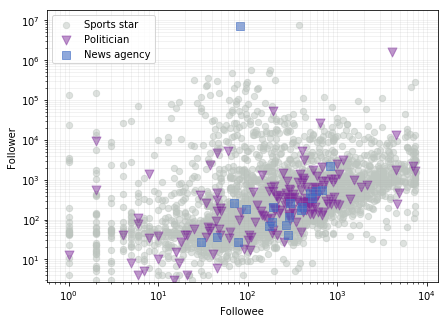

In [13]:
def plot_1():
    
    fig, (ax1) = plt.subplots(1,1, figsize=(7,5))

    sport_color = CRISTIANO_RONALDO_COLOR
    sport_alpha = 0.5
    sport_market = "o"
    
    df_sport = df[df['combined_shortcode_username'] == CRISTIANO_RONALDO]
    if (not df_sport.shape[0] == 0):
        ax = df_sport.plot.scatter(x='combined_followee', y='combined_follower', ax=ax1, c=sport_color, alpha=sport_alpha, logy=True, logx=True, grid=True, s=40,  marker=sport_market, legend=False, label='Sports star')
    
    df_sport = df[df['combined_shortcode_username'] == ROGER_FEDERER]
    if (not df_sport.shape[0] == 0):
        ax = df_sport.plot.scatter(x='combined_followee', y='combined_follower', ax=ax1, c=sport_color, alpha=sport_alpha, logy=True, logx=True, grid=True, s=40,  marker=sport_market, legend=False, label='Sports star')
    
    df_sport = df[df['combined_shortcode_username'] == RAFAEL_NADAL]
    if (not df_sport.shape[0] == 0):
        ax = df_sport.plot.scatter(x='combined_followee', y='combined_follower', ax=ax1, c=sport_color, alpha=sport_alpha, logy=True, logx=True, grid=True, s=40,  marker=sport_market, legend=False, label='Sports star')
    
    df_sport = df[df['combined_shortcode_username'] == LEOMESSI]
    if (not df_sport.shape[0] == 0):
        ax = df_sport.plot.scatter(x='combined_followee', y='combined_follower', ax=ax1, c=sport_color, alpha=sport_alpha, logy=True, logx=True, grid=True, s=40,  marker=sport_market, legend=True, label='Sports star')
    
    

    color_politician = BARACK_OBAMA_COLOR
    politician_alpha = 0.5
    politician_market = "v"
    
    df_politician = df[df['combined_shortcode_username'] == DONALD_TRUMP]
    if (not df_politician.shape[0] == 0):
        ax = df_politician.plot.scatter(x='combined_followee', y='combined_follower', ax=ax1, c=color_politician, alpha=politician_alpha, logy=True, logx=True, grid=True, s=80, marker=politician_market, legend=False, label='Impostor - Trump')
  
    df_politician = df[df['combined_shortcode_username'] == BARACK_OBAMA]
    if (not df_politician.shape[0] == 0):
        ax = df_politician.plot.scatter(x='combined_followee', y='combined_follower', ax=ax1, c=color_politician, alpha=politician_alpha, logy=True, logx=True, grid=True, s=80,  marker=politician_market, legend=False, label='Impostor - Obama')
  
    df_politician = df[df['combined_shortcode_username'] == EMMANUEL_MACRON]
    if (not df_politician.shape[0] == 0):
        ax = df_politician.plot.scatter(x='combined_followee', y='combined_follower', ax=ax1, c=color_politician, alpha=politician_alpha, logy=True, logx=True, grid=True, s=80, legend=True,  marker=politician_market, label='Politician')
    
    
    news_color = DONALD_TRUMP_COLOR
    news_alpha = 0.6
    news_market = "s"
    news_size = 50
    
    df_sport = df[df['combined_shortcode_username'] == BBC]
    if (not df_sport.shape[0] == 0):
        ax = df_sport.plot.scatter(x='combined_followee', y='combined_follower', ax=ax1, c=news_color, alpha=news_alpha, logy=True, logx=True, grid=True, s=news_size,  marker=news_market, legend=False, label='Sports star')
    
    df_sport = df[df['combined_shortcode_username'] == CNN]
    if (not df_sport.shape[0] == 0):
        ax = df_sport.plot.scatter(x='combined_followee', y='combined_follower', ax=ax1, c=news_color, alpha=news_alpha, logy=True, logx=True, grid=True, s=news_size,  marker=news_market, legend=False, label='Sports star')
    
    df_sport = df[df['combined_shortcode_username'] == FOXNEWS]
    if (not df_sport.shape[0] == 0):
        ax = df_sport.plot.scatter(x='combined_followee', y='combined_follower', ax=ax1, c=news_color, alpha=news_alpha, logy=True, logx=True, grid=True, s=news_size,  marker=news_market, legend=True, label='News agency')
    
    
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    ax.set_ylabel("Follower")
    ax.set_xlabel("Followee")
    

    plt.savefig("plot_Similarity4_P1.pdf")
    
plot_1()

In [19]:
import seaborn as sns
sns.set(style="darkgrid")
titanic = sns.load_dataset("titanic")
titanic.head(10)

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
5    man        True  NaN   Queenstown    no   True  
6    man        True    E  Southampton    no   True  
7  child       False  NaN  Southampton    no  False  
8  woman       False  NaN  Southampton   yes  False  
9  child       False  NaN    Cherbourg   yes  False

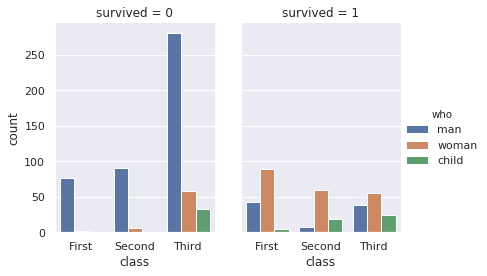

In [23]:
g = sns.catplot(x="class", hue="who", col="survived", data=titanic, kind="count", height=4, aspect=.7)

In [129]:
df_dataset_transposed = df_dataset.T

In [130]:
df_dataset_transposed.columns

Index(['#name', '#count', '#class', 'similar #username', 'similar #fullname',
       'similar #bio', 'similar #photo', '#public', '#verified',
       'avg #follower', 'avg #followee', 'avg #mediacount', 'avg #comment',
       'avg #like', 'avg #bio word', 'avg #bio hashtag', 'avg #bio mention',
       'common #metric 4', 'common #metric 3', 'common #metric 2',
       'common #metric 1'],
      dtype='object', name='#')

In [131]:
df_dataset_transposed.head()

#                          #name #count       #class similar #username  \
realdonaldtrump  realdonaldtrump    108    Politican                37   
barackobama          barackobama     38    Politican                 6   
emmanuelmacron    emmanuelmacron     29    Politican                 4   
theresamay            theresamay     17    Politican                12   
cnn                          cnn      0  News agency                 0   

#               similar #fullname similar #bio similar #photo #public  \
realdonaldtrump                36           88             19      49   
barackobama                    10           34              4      18   
emmanuelmacron                  8           26              2       9   
theresamay                     10           11              7       3   
cnn                             0            0              0       0   

#               #verified avg #follower       ...        avg #mediacount  \
realdonaldtrump         1           108       ...                 223.13   
barackobama             0            38       ...                266.447   
emmanuelmacron          0            29       ...                108.241   
theresamay              0            17       ...                221.941   
cnn                     0             0       ...                    NaN   

#               avg #comment avg #like avg #bio word avg #bio hashtag  \
realdonaldtrump         2.75      None       8.34259         0.240741   
barackobama         0.842105      None       5.07895                0   
emmanuelmacron      0.551724      None       3.82759         0.344828   
theresamay           2.70588      None       5.88235         0.235294   
cnn                      NaN      None           NaN              NaN   

#               avg #bio mention common #metric 4 common #metric 3  \
realdonaldtrump         0.185185                9               16   
barackobama             0.131579                3                2   
emmanuelmacron          0.206897                1                2   
theresamay              0.235294                5                3   
cnn                          NaN                0                0   

#               common #metric 2 common #metric 1  
realdonaldtrump               13               70  
barackobama                    3               30  
emmanuelmacron                 4               22  
theresamay                     2                7  
cnn                            0                0  

[5 rows x 21 columns]

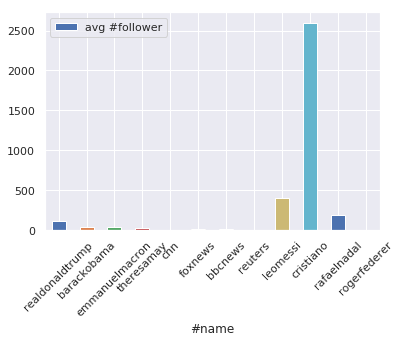

In [134]:
df_dataset_transposed.plot.bar(x='#name', y='avg #follower', rot=45)

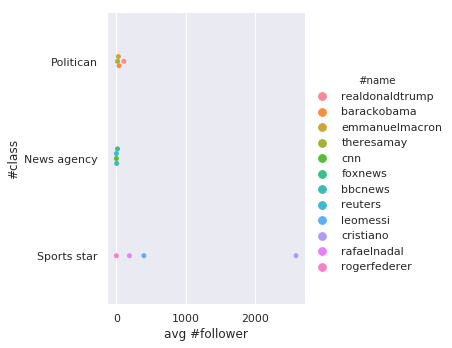

In [148]:
sns.catplot(x="avg #follower", hue="#name", y="#class", kind="swarm",  data=df_dataset_transposed);